# Face Generation

In this project, we will build and train a DCGAN on a dataset of faces. The goal is to get a generator network to generate *new* images of faces that look as realistic as possible.

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. Our goal is that the generated samples look like fairly realistic faces with small amounts of noise.

### The data set

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

### Pre-processed Data

Since the project's main focus is on building the GANs, It has been done a  prior pre-processing. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

First, we set de data path and load the imports:

In [2]:
data_dir = 'processed_celeba_small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
#import helper

%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.

In order to correctly handler the dataset, we will implement a `get_dataloader` function, such that it satisfies these requirements:

* The images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* We will need a DataLoader that shuffles and batches these Tensor images.
* We need some data augmentation



In [3]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms

def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    transform = transforms.Compose([
        transforms.Resize((image_size,image_size)),
        transforms.CenterCrop(image_size),
        transforms.ToTensor()
    ])
    # TODO: Implement function and return a dataloader
    image_dataset = datasets.ImageFolder(data_dir, transform)
    
    image_loader = torch.utils.data.DataLoader(image_dataset, batch_size, shuffle=True, num_workers=0)
    
    return image_loader

Once given the function, we will use to get the DataLoader from our dataset. 

We will use an image size of 32x32 pixels, due to image size contrains and a batch size betwen [32-256] would be fine. 128 in our case. 


In [4]:
# Define function hyperparameters
batch_size = 128
img_size = 32

celeba_train_loader = get_dataloader(batch_size, img_size)

Now that we have our dataloader, let's print some of our resulting training images

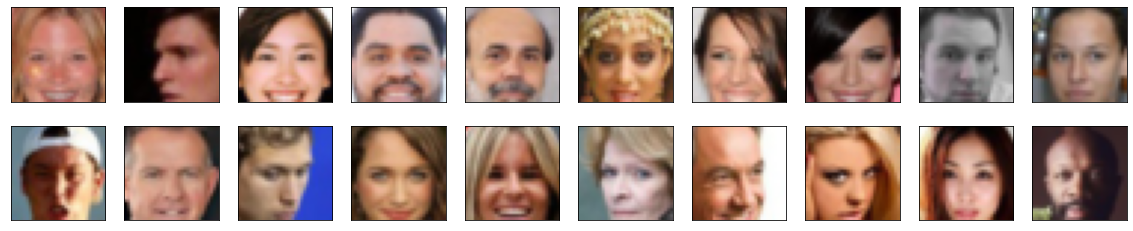

In [5]:
# helper display function
import torchvision.utils as vutils

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

Everything seems fine.

Some extra preprocessing is needed.

We will need to scale the image data to a pixel range of -1 to 1. This is because of the output of the generator. 

The output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

Then, we will implement an scale function to fix it.

In [6]:
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    minn, maxx = feature_range
    x = x*(maxx-minn) + minn
    
    return x

Let's test it

In [7]:
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-0.8353)
Max:  tensor(0.9373)
